## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


## 데이터 생성

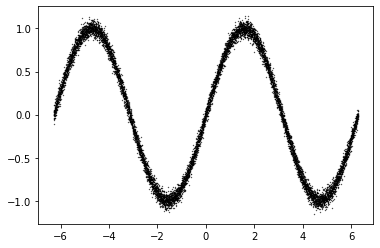

In [3]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의
#### Q. `tf.keras.layers.Dense`함수를 이용해서 Fully Connected Layer를 구성해 보시오.

In [4]:
# layer 종류 중 Dense layer를 통해 모델을 만든다
# 모델은 3계층으로 hidden 20, hidden 20, output 1이다.
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(1,)), #처음 input layer는 1*1, hidden layer1는 20개의 뉴런을 가지고 있기 때문에 unit=20 | 활성화함수는 ReLu사용
    keras.layers.Dense(20, activation='relu'), # hidden layer2는 20개의 뉴런을 가지고 있기 때문에 unit=20 | 활성화함수는 ReLu사용
    keras.layers.Dense(20, activation='relu'), # hidden layer를 하나 더 늘려서 돌려보면 정확도가 좀 더 좋게 나옴
    keras.layers.Dense(1) # output layer의미 output layer는 1*1이다
])

## 모델 훈련 설정
#### Q. 훈련에 필요한 Optimizer, Loss, Metrics 설정하시오.

In [5]:
# loss, optimizer, metric 설정 
# optimizer는 'adam'으로 metric은 'mae', 'mse'로 설정
model.compile(optimizer= 'adam',
              loss= 'mse',
              metrics= ['mae','mse']) 

## 모델 훈련
#### Q. 모델을 훈련하기 위해 training set, label, epoch 등을 지정하시오.

In [6]:
# epoch는 20 이상
model.fit(inputs, outputs, epochs=50)

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2640 - mae: 0.4246 - mse: 0.2640
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - mae: 0.1987 - mse: 0.0821
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - mae: 0.1607 - mse: 0.0596
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0429 - mae: 0.1349 - mse: 0.0429
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0314 - mae: 0.1142 - mse: 0.0314
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0221 - mae: 0.0954 - mse: 0.0221
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0156 - mae: 0.0816 - mse: 0.0156
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0111 - mae: 0.0718 - mse: 0.0111
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0077 - mae: 0.0623 - mse: 0.0077
Epoch 10/50
313/313

In [7]:
test_loss, test_mse, test_mae = model.evaluate(inputs, outputs, verbose=0)
print('\n테스트 MSE:', test_mse)


테스트 MSE: 0.04218290001153946


## 테스트

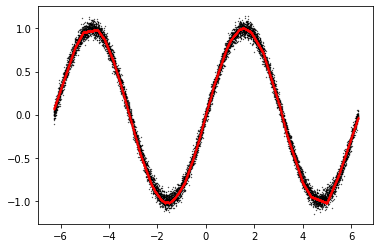

In [8]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)